In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
mall0 = pd.read_csv("Mall_Customers.csv")
mall0.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Renaming columns

In [3]:
mall0.rename({'Annual Income (k$)':'Income', 
              'Spending Score (1-100)':'Spend_score'}, 
             axis=1, inplace=True)
mall0.head()

,CustomerID,Gender,Age,Income,Spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Visualize the data using a scatterplot

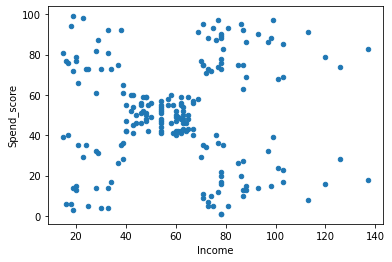

In [4]:
mall0.plot.scatter(x='Income', y='Spend_score')
plt.show()

#### Standardizing the data

In [5]:
mall_scaled = mall0.copy()
cols_to_scale = ['Age', 'Income', 'Spend_score']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

mall_scaled[cols_to_scale] = scaler.fit_transform(mall_scaled[cols_to_scale])

#### K means clustering - varying number of clusters

In [6]:
from sklearn.cluster import KMeans

In [7]:
cluster_cols = ['Income', 'Spend_score']

In [8]:
markers = ['x', '*', '.', '|', '_', '1', '2']

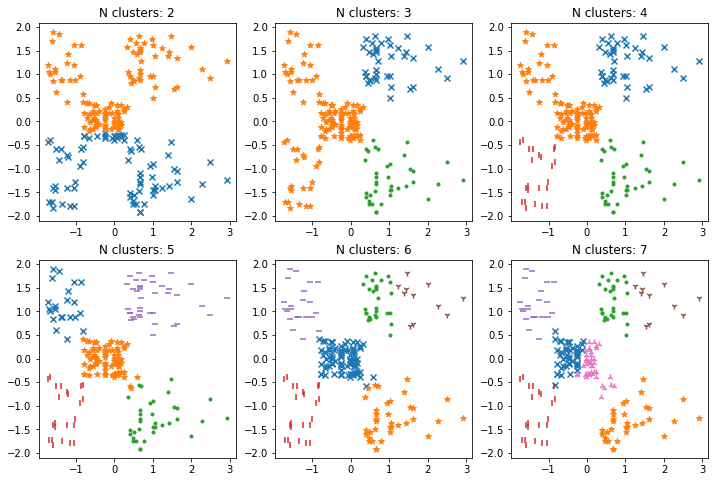

In [9]:
plt.figure(figsize=[12,8])
for n in range(2,8):
    model = KMeans(n_clusters=n, random_state=42)
    mall_scaled['Cluster']= model.fit_predict(mall_scaled[cluster_cols])
    
    plt.subplot(2,3, n-1)
    for clust in range(n):
        temp = mall_scaled[mall_scaled.Cluster == clust]
        plt.scatter(temp.Income, temp.Spend_score, marker=markers[clust])
        plt.title("N clusters: "+str(n))

plt.show()

### Sum of squared distances from centers

In [10]:
K = 3

In [11]:
model = KMeans(n_clusters=K, random_state=42)
model.fit(mall_scaled[cluster_cols])

KMeans(n_clusters=3, random_state=42)

In [12]:
print(model.inertia_)

157.70400815035939


In [13]:
X = mall_scaled[cluster_cols]

In [14]:
inertia_scores = []
for K in range(2,11):
    inertia = KMeans(n_clusters=K, random_state=42).fit(X).inertia_
    inertia_scores.append(inertia)

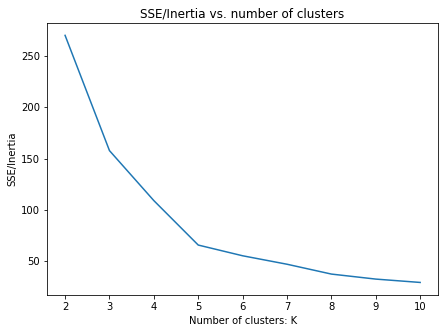

In [15]:
plt.figure(figsize=[7,5])
plt.plot(range(2,11), inertia_scores)
plt.title("SSE/Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('SSE/Inertia')
plt.show()

# Mean shift 

#### Exercise 4.4: Meanshift on mall customers

In [16]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [17]:
bandwidth = 0.9

In [19]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(mall_scaled[cluster_cols])

mall_scaled['Cluster']= ms.predict(X)

#### Visualize the clusters obtained.

In [20]:
markers = ['x', '*', '.', '|', '_', '1', '2']

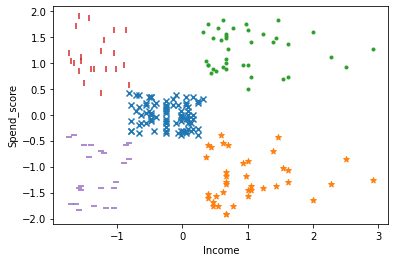

In [21]:
for clust in range(mall_scaled.Cluster.nunique()):
    temp = mall_scaled[mall_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, marker=markers[clust])
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.show()

#### Estimating bandwidth using quantiling

In [26]:
bandwidth = estimate_bandwidth(mall_scaled[cluster_cols], quantile=0.1)
print(bandwidth)

0.6487582521320147


In [27]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(mall_scaled[cluster_cols])
mall_scaled['Cluster']= ms.predict(mall_scaled[cluster_cols])

In [28]:
mall_scaled.Cluster.nunique()

7

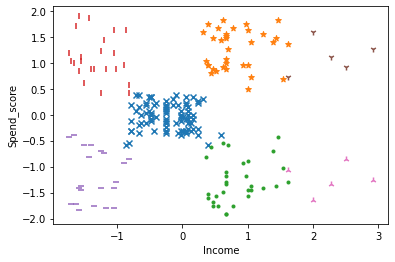

In [29]:
for clust in range(mall_scaled.Cluster.nunique()):
    temp = mall_scaled[mall_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, marker=markers[clust])
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.show()

#### Using a different value of quantile

In [ ]:
bandwidth = estimate_bandwidth(mall_scaled[cluster_cols], quantile=0.15)
print(bandwidth)

In [30]:
nprint(bandwidth)

0.8582301835333547


In [31]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(mall_scaled[cluster_cols])
mall_scaled['Cluster']= ms.predict(mall_scaled[cluster_cols])
mall_scaled.Cluster.nunique()

5

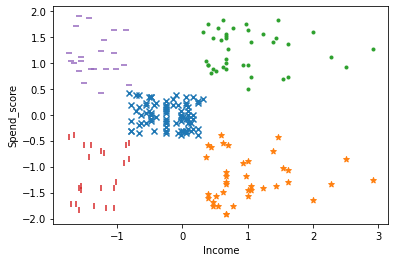

In [32]:
for clust in range(mall_scaled.Cluster.nunique()):
    temp = mall_scaled[mall_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, marker=markers[clust])
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.show()

### K-prototypes algorithm

In [52]:
bank0.shape

(5000, 14)

In [33]:
bank0 = pd.read_csv("Bank_Personal_Loan_Modelling-2.csv")
bank0.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,Primary,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,Primary,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,Primary,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,Secondary,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,Secondary,0,0,0,0,0,1


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
bank_scaled = bank0.copy()
bank_scaled['Income'] = scaler.fit_transform(bank0[['Income']])

In [36]:
from kmodes.kprototypes import KPrototypes

In [37]:
cluster_cols = ['Income', 'Education'] 

In [38]:
X = bank_scaled[cluster_cols].values

In [40]:
%%time
kp = KPrototypes(n_clusters=3, random_state=42)
bank_scaled['Cluster'] = kp.fit_predict(bank_scaled[cluster_cols], categorical=[1])

Wall time: 28.6 s


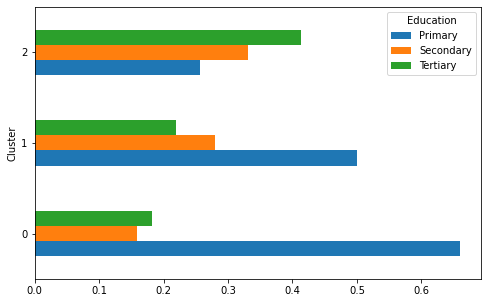

In [41]:
res = bank_scaled.groupby('Cluster')['Education'].value_counts(normalize=True)
res.unstack().plot.barh(figsize=[8,5])
plt.show()

### Exercise 4.x: Using Silhouette Score to pick optimal number of clusters

In [46]:
cluster_cols = ['Income', 'Spend_score']
X = mall_scaled[cluster_cols]

In [47]:
model = KMeans(n_clusters=3, random_state=42)
cluster_assignments = model.fit_predict(X)

In [48]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, cluster_assignments)
print(silhouette_avg)

0.46658474419000145


In [49]:
silhouette_scores = []

for K in range(2, 11):
    model = KMeans(n_clusters=K, random_state=42)
    cluster_assignments = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_assignments)
    silhouette_scores.append(silhouette_avg)

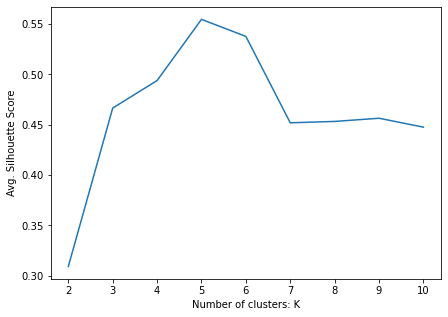

In [50]:
plt.figure(figsize=[7,5])
plt.plot(range(2,11), silhouette_scores)
plt.xlabel("Number of clusters: K")
plt.ylabel('Avg. Silhouette Score')
plt.show()

### Train test split

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
df_train, df_test = train_test_split(mall0, train_size=0.75, random_state=42)

In [146]:
print(df_train.shape)
print(df_test.shape)

(150, 5)
(50, 5)


In [121]:
# cluster_cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg']

In [175]:
cluster_cols = ['Income', 'Spend_score']

In [176]:
df_train[cluster_cols] = scaler.fit_transform(df_train[cluster_cols])

In [177]:
df_test[cluster_cols] = scaler.transform(df_test[cluster_cols])

#### K means on the train data with 6 clusters

In [182]:
model = KMeans(n_clusters=6, random_state=42)
df_train['Cluster'] = model.fit_predict(df_train[cluster_cols])
silhouette_avg = silhouette_score(df_train[cluster_cols], df_train['Cluster'])
print(silhouette_avg)

0.5447425701743152


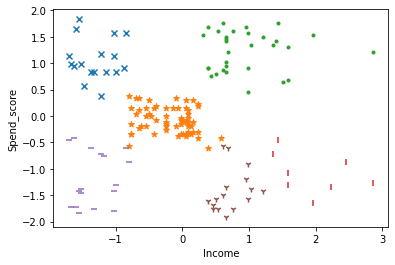

In [183]:
for clust in range(df_train.Cluster.nunique()):
    temp = df_train[df_train.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, marker=markers[clust])
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.show()

In [184]:
df_test['Cluster'] = model.predict(df_test[cluster_cols])
silhouette_avg = silhouette_score(df_test[cluster_cols],df_test['Cluster'])
print(silhouette_avg)

0.49515414740736674


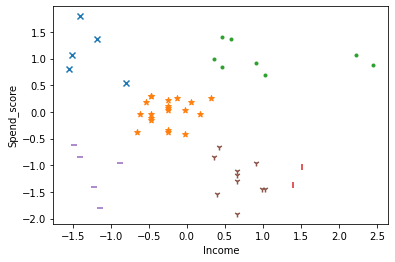

In [185]:
for clust in range(df_test.Cluster.nunique()):
    temp = df_test[df_test.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, marker=markers[clust])
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.show()

#### Estimating required bandwidth using the train data

In [152]:
bandwidth = estimate_bandwidth(df_train[cluster_cols], quantile=0.1)
print(bandwidth)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df_train[cluster_cols])
df_train['Cluster']= ms.predict(df_train[cluster_cols])

0.6565303569228812


In [153]:
cluster_assignments = model.fit_predict(df_train[cluster_cols])
silhouette_avg = silhouette_score(df_train[cluster_cols], cluster_assignments)
print(silhouette_avg)

0.4754230830920771


In [155]:
cluster_assignments = model.predict(df_test[cluster_cols])
df_test['Cluster']= ms.predict(df_test[cluster_cols])
silhouette_avg = silhouette_score(df_test[cluster_cols], cluster_assignments)
print(silhouette_avg)

0.36807092039164097


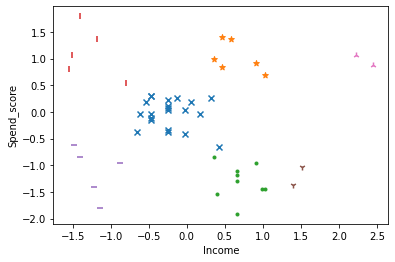

In [156]:
for clust in range(df_test.Cluster.nunique()):
    temp = df_test[df_test.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, marker=markers[clust])
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.show()